In [1]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from torchsummary import summary
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv("D:/files/BP_data.csv")
df

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,1,10.14,0.02,69,26,1,NaN,1,26118,47568,144.0,3,1,0
1996,1997,1,11.77,1.00,24,45,1,1.0,1,2572,8063,NaN,3,1,1
1997,1998,1,16.91,0.22,18,42,0,NaN,0,14933,24753,NaN,2,1,1
1998,1999,0,11.15,0.72,46,45,1,NaN,1,18157,15275,253.0,3,0,1


In [5]:
df.columns

Index(['Patient_Number', 'Blood_Pressure_Abnormality', 'Level_of_Hemoglobin',
       'Genetic_Pedigree_Coefficient', 'Age', 'BMI', 'Sex', 'Pregnancy',
       'Smoking', 'Physical_activity', 'salt_content_in_the_diet',
       'alcohol_consumption_per_day', 'Level_of_Stress',
       'Chronic_kidney_disease', 'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [7]:
df['Blood_Pressure_Abnormality'].value_counts()

Blood_Pressure_Abnormality
0    1013
1     987
Name: count, dtype: int64

In [9]:
# 결측치 확인
print("\n 결측값 확인:")
print(df.isnull().sum())


 결측값 확인:
Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64


In [11]:
# 'Pregnancy' 컬럼에서 값이 비어있는(null) 행들은 0으로 채우기
df.loc[df['Pregnancy'].isnull(), 'Pregnancy'] = 0

# 'Genetic_Pedigree_Coefficient' (유전 계수) 컬럼에서 비어 있는 값은 2로 채우기
df.loc[df['Genetic_Pedigree_Coefficient'].isnull(), 'Genetic_Pedigree_Coefficient'] = 2

#'alcohol_consumption_per_day' (하루 알코올 소비량) 컬럼의 평균값을 계산해서 mean_alcohol에 저장
mean_alcohol = df['alcohol_consumption_per_day'].mean()

# 'alcohol_consumption_per_day' 컬럼에서 비어있는 값들은 그 컬럼의 평균값(mean_alcohol) 으로 채우기
df['alcohol_consumption_per_day'] = df['alcohol_consumption_per_day'].fillna(mean_alcohol)

print(df.isnull().sum())

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64


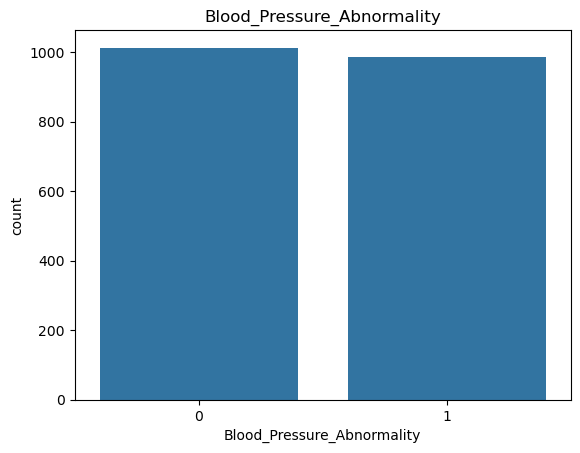

In [13]:
sns.countplot(data=df, x='Blood_Pressure_Abnormality')
plt.title('Blood_Pressure_Abnormality')
plt.xlabel('Blood_Pressure_Abnormality')
plt.ylabel('count')

plt.show()

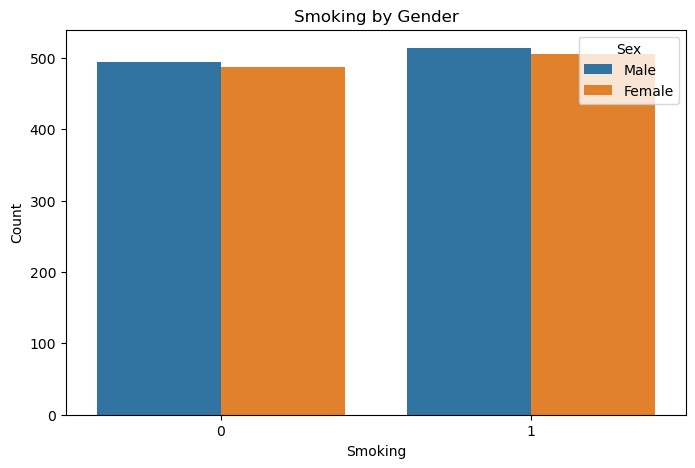

In [15]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Smoking', hue='Sex')

plt.title('Smoking by Gender')
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])  # assuming 0=Male, 1=Female

plt.show()

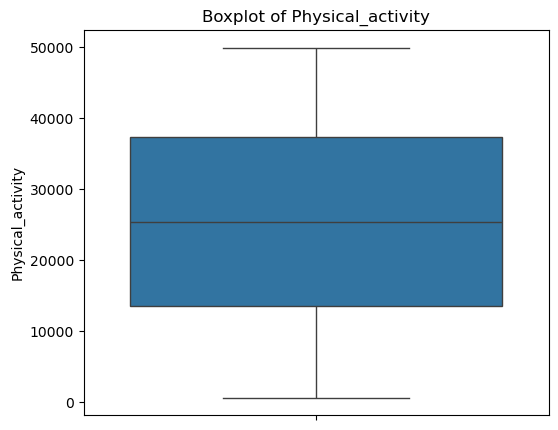

In [61]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=df['Physical_activity'])  
plt.title('Boxplot of Physical_activity')
plt.ylabel('Physical_activity')
#plt.grid(True)
plt.show()

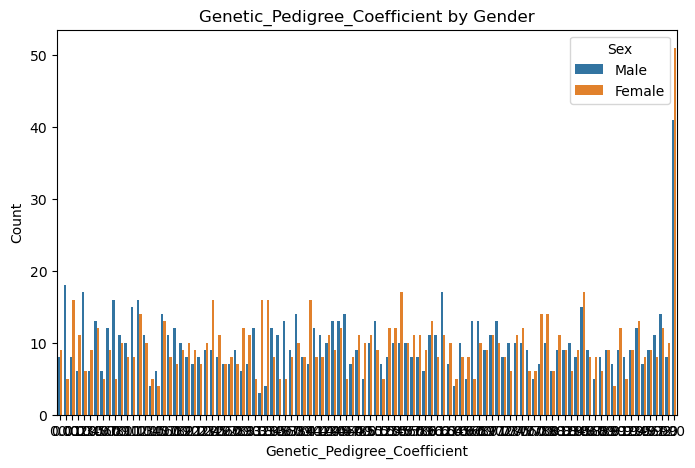

In [63]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Genetic_Pedigree_Coefficient', hue='Sex')

plt.title('Genetic_Pedigree_Coefficient by Gender')
plt.xlabel('Genetic_Pedigree_Coefficient')
plt.ylabel('Count')
plt.legend(title='Sex', labels=['Male', 'Female'])  # assuming 0=Male, 1=Female

plt.show()

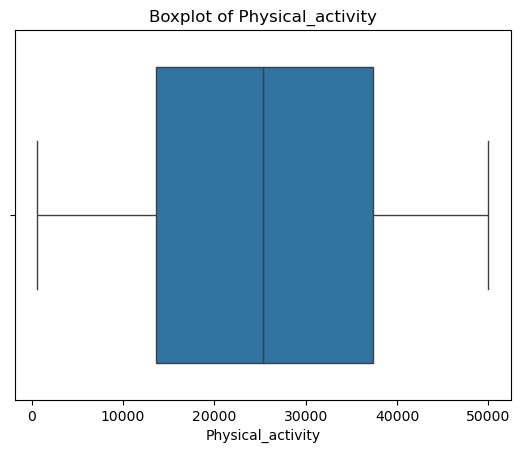

In [21]:
 # 가로 방향
sns.boxplot(x=df['Physical_activity']) 
plt.title('Boxplot of Physical_activity')
plt.xlabel('Physical_activity')
plt.show()

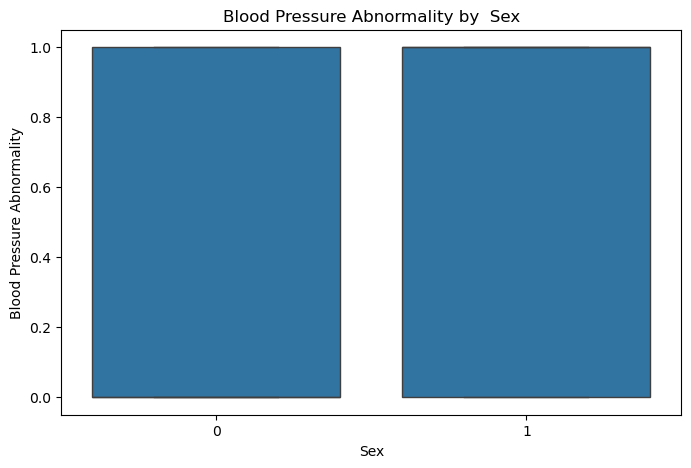

In [23]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sex', y='Blood_Pressure_Abnormality')

plt.title('Blood Pressure Abnormality by  Sex')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure Abnormality')
plt.show()

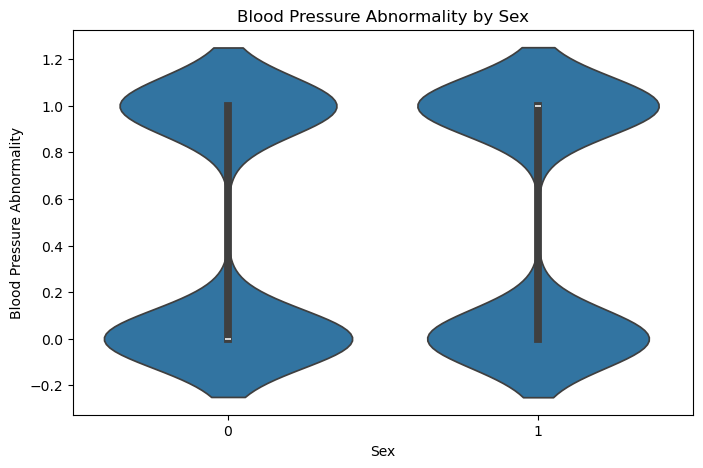

In [25]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x= 'Sex', y='Blood_Pressure_Abnormality')

plt.title('Blood Pressure Abnormality by Sex')
plt.xlabel('Sex')
plt.ylabel('Blood Pressure Abnormality')
plt.show()

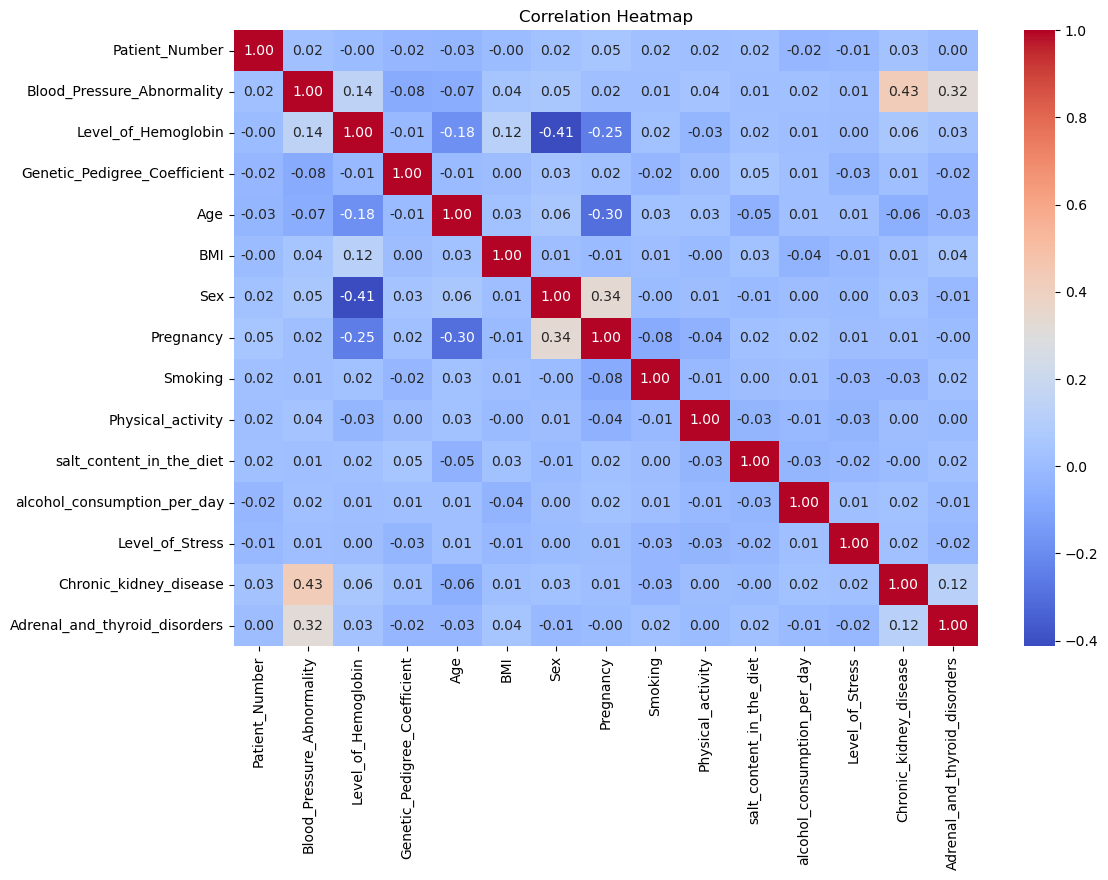

In [27]:
numeric_df = df.select_dtypes(include='number')

# 상관계수 계산
correlation = numeric_df.corr()

# 히트맵 그리기
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap')
plt.show()

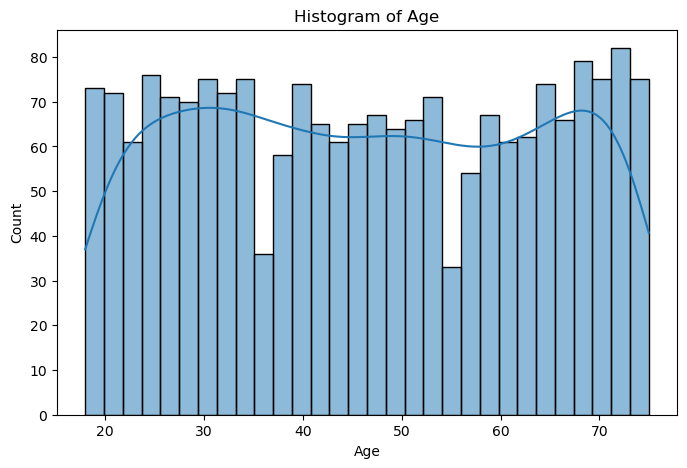

In [29]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='Age', kde=True, bins=30)

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Count')

plt.show()

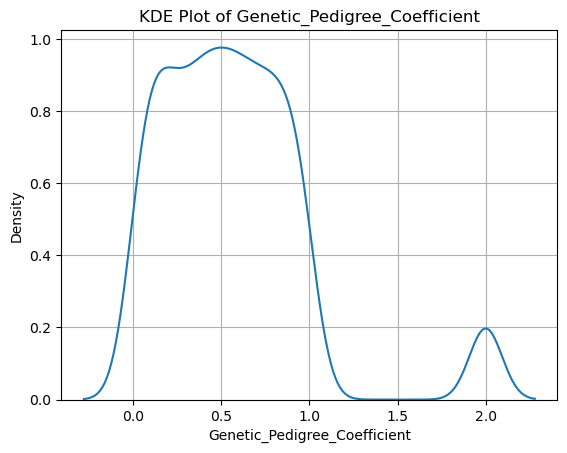

In [31]:
sns.kdeplot(data=df, x='Genetic_Pedigree_Coefficient')
plt.title('KDE Plot of Genetic_Pedigree_Coefficient')
plt.xlabel('Genetic_Pedigree_Coefficient')
plt.ylabel('Density')
plt.grid(True)
plt.show()

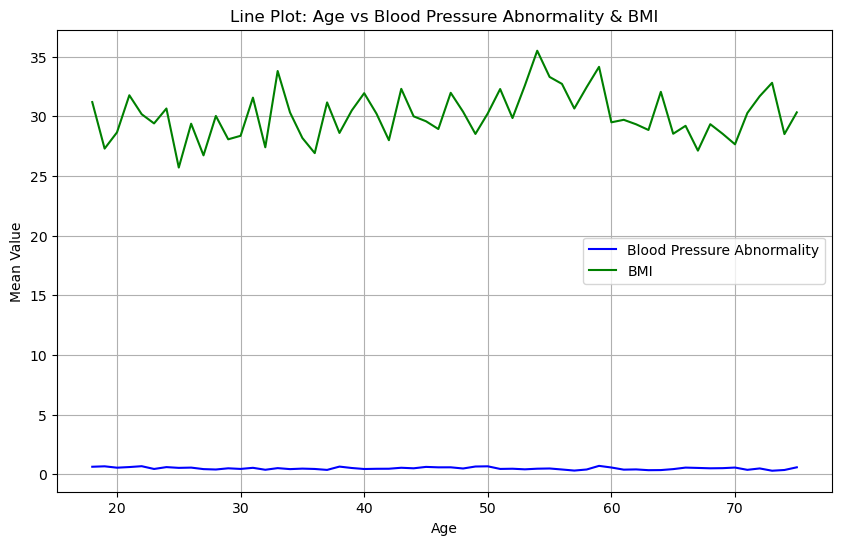

In [33]:
age_grouped = df.groupby('Age')[['Blood_Pressure_Abnormality', 'BMI']].mean().reset_index()


plt.figure(figsize=(10, 6))
sns.lineplot(data=age_grouped, x='Age', y='Blood_Pressure_Abnormality', label='Blood Pressure Abnormality', color='blue')
sns.lineplot(data=age_grouped, x='Age', y='BMI', label='BMI', color='green')

plt.title('Line Plot: Age vs Blood Pressure Abnormality & BMI')
plt.xlabel('Age')
plt.ylabel('Mean Value')
plt.legend()
plt.grid(True)
plt.show()

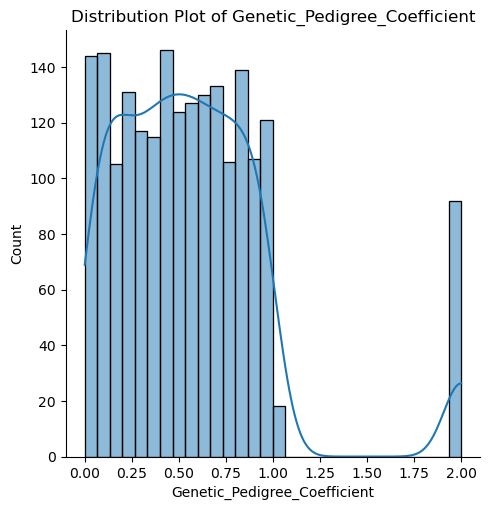

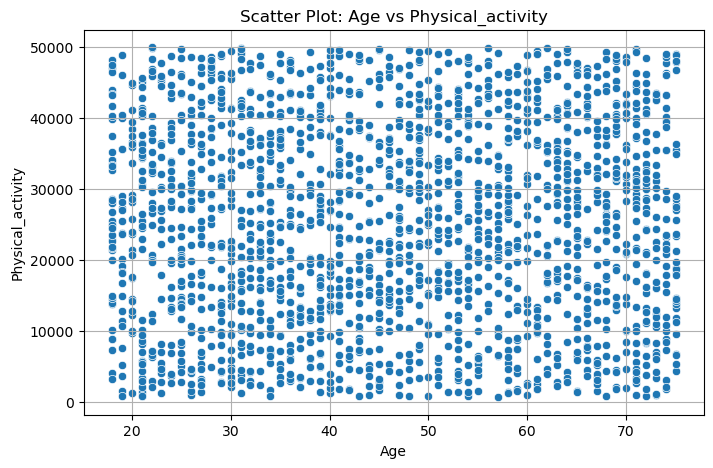

In [37]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Age', y='Physical_activity')

plt.title('Scatter Plot: Age vs Physical_activity')
plt.xlabel('Age')
plt.ylabel('Physical_activity')
plt.grid(True)
plt.show()

In [39]:
target_column = "Blood_Pressure_Abnormality"  
X = df.drop(columns=[target_column]).values
y = df[target_column].values

In [41]:
# 데이터 분할 및 전처리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((1600, 14), (400, 14), (1600,), (400,))

In [45]:
# Convert to PyTorch tensors
# Convert to PyTorch tensors (이진 분류용으로 수정)
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [47]:
# Create DataLoader
train_dataset = TensorDataset(X_train, y_train)
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)

test_dataset = TensorDataset(X_test, y_test)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

(torch.Size([1600, 14]),
 torch.Size([400, 14]),
 torch.Size([1600, 1]),
 torch.Size([400, 1]))

In [51]:
class BPdataDense(nn.Module):
    def __init__(self):
        super(BPdataDense, self).__init__()
        self.fc1 = nn.Linear(14, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)  
    
    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x) 
    #x = torch.sigmoid(self.fc3(x))  # 다중 클래스  x = self.fc3(x) 
        return x

# Initialize the model, loss function, and optimizer
model = BPdataDense()

In [53]:
#criterion = nn.BCELoss() 
criterion = nn.BCEWithLogitsLoss()   #이진클래스 sigmoid를 안 쓸때
# 다중 클래스 CrossEntropyLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [55]:
# Variables to store loss and accuracy
train_losses = []
test_accuracies = []

# Training loop
num_epochs = 20
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_dataloader:
        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    # Calculate average loss over an epoch
    train_losses.append(running_loss / len(train_dataloader))

    # Evaluate on test data
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_dataloader:
            outputs = model(inputs)
            predicted = (outputs > 0.5).int()

        # 레이블도 int로 맞추고 shape 맞추기
            labels = labels.int()
        
            correct += (predicted.view(-1) == labels.view(-1)).sum().item()
            total += labels.size(0)

            accuracy = 100 * correct / total

    test_accuracies.append(accuracy)

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {train_losses[-1]:.4f}, Accuracy: {accuracy:.2f}%")

print("Training complete.")

Epoch 1/20, Loss: 0.5501, Accuracy: 76.75%
Epoch 2/20, Loss: 0.4756, Accuracy: 79.00%
Epoch 3/20, Loss: 0.4326, Accuracy: 81.50%
Epoch 4/20, Loss: 0.3952, Accuracy: 83.25%
Epoch 5/20, Loss: 0.3715, Accuracy: 81.25%
Epoch 6/20, Loss: 0.3382, Accuracy: 83.00%
Epoch 7/20, Loss: 0.3170, Accuracy: 82.00%
Epoch 8/20, Loss: 0.3196, Accuracy: 84.25%
Epoch 9/20, Loss: 0.2826, Accuracy: 85.75%
Epoch 10/20, Loss: 0.2951, Accuracy: 85.75%
Epoch 11/20, Loss: 0.2597, Accuracy: 85.50%
Epoch 12/20, Loss: 0.2511, Accuracy: 85.25%
Epoch 13/20, Loss: 0.2311, Accuracy: 87.25%
Epoch 14/20, Loss: 0.2295, Accuracy: 85.25%
Epoch 15/20, Loss: 0.2009, Accuracy: 84.50%
Epoch 16/20, Loss: 0.1981, Accuracy: 83.00%
Epoch 17/20, Loss: 0.1947, Accuracy: 83.25%
Epoch 18/20, Loss: 0.1850, Accuracy: 83.50%
Epoch 19/20, Loss: 0.1690, Accuracy: 83.50%
Epoch 20/20, Loss: 0.1640, Accuracy: 84.50%
Training complete.


In [57]:
# Evaluation
model.eval()
all_labels = []
all_predictions = []
with torch.no_grad():
    for inputs, labels in test_dataloader:
        outputs = model(inputs)
        predicted = (outputs > 0.5).int()  # 확률이 0.5 초과이면 1로 예측
        all_labels.extend(labels.cpu().numpy())
        all_predictions.extend(predicted.cpu().numpy())


# Calculate metrics
conf_matrix = confusion_matrix(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions, average='weighted')
precision = precision_score(all_labels, all_predictions, average='weighted')
recall = recall_score(all_labels, all_predictions, average='weighted')

# Calculate specificity for each class
specificity = []
for i in range(conf_matrix.shape[0]):
    tn = conf_matrix.sum() - (conf_matrix[i, :].sum() + conf_matrix[:, i].sum() - conf_matrix[i, i])
    fp = conf_matrix[:, i].sum() - conf_matrix[i, i]
    specificity.append(tn / (tn + fp))

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'F1 Score: {f1:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'Specificity: {np.mean(specificity):.2f}')

Confusion Matrix:
[[193  30]
 [ 32 145]]
F1 Score: 0.84
Precision: 0.84
Recall: 0.84
Specificity: 0.84


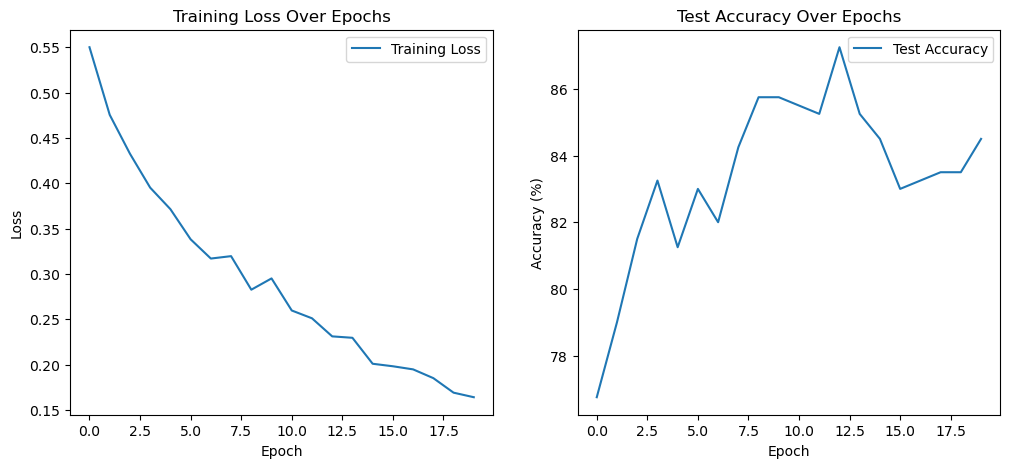

In [59]:
# Plot the loss and accuracy
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy Over Epochs')
plt.legend()

plt.show()